In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from progressbar import progressbar as pbar
from joblib import Parallel, delayed


In [3]:
osmfolder = "/opt/data/california-naip-chips/osm"
files = os.listdir(osmfolder)
len(files)

112320

In [4]:
def count(file):
    chip_id = file.split(".")[0]
    z = gpd.read_parquet(f"{osmfolder}/{file}")
    return chip_id, len(z)

In [5]:
counts = Parallel(n_jobs=10, verbose=5)(delayed(count)(file) for file in files)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  54 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 586 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1594 tasks      | elapsed:    5.1s
[Parallel(n_jobs=10)]: Done 2890 tasks      | elapsed:    8.5s
[Parallel(n_jobs=10)]: Done 4474 tasks      | elapsed:   12.7s
[Parallel(n_jobs=10)]: Done 6346 tasks      | elapsed:   17.6s
[Parallel(n_jobs=10)]: Done 8506 tasks      | elapsed:   23.3s
[Parallel(n_jobs=10)]: Done 10954 tasks      | elapsed:   29.7s
[Parallel(n_jobs=10)]: Done 13690 tasks      | elapsed:   36.9s
[Parallel(n_jobs=10)]: Done 16714 tasks      | elapsed:   44.8s
[Parallel(n_jobs=10)]: Done 20026 tasks      | elapsed:   53.5s
[Parallel(n_jobs=10)]: Done 23626 tasks      | elapsed:  1.0min
[Parallel(n_jobs=10)]: Done 27514 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 31690 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 36154 ta

In [6]:
len(counts)

112320

In [7]:
len(counts)

112320

In [8]:
counts[:10]

[('363a8bd1189d2', 2),
 ('2e40268e9f603', 1),
 ('1ff73cff31463', 1),
 ('0fa44a50e26f3', 2),
 ('10164c9de3dbc', 3),
 ('107eb5b33ddeb', 1),
 ('33b3e1ad14a3f', 1),
 ('1885bed8725e9', 1),
 ('06d6590f81392', 5),
 ('31ed66f140bb9', 2)]

In [9]:
z = pd.DataFrame(counts, columns=['chipid', 'count'])
z.head()

,chipid,count
0,363a8bd1189d2,2
1,2e40268e9f603,1
2,1ff73cff31463,1
3,0fa44a50e26f3,2
4,10164c9de3dbc,3


Text(0.5, 1.0, 'chips with at most 40 osm objects account for 94.49% of total chips with >0 objects')

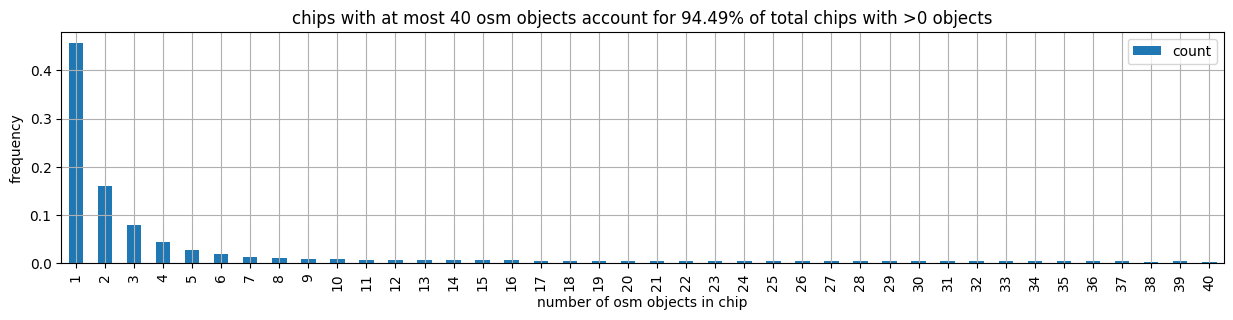

In [10]:
k = pd.DataFrame([z['count'].value_counts().sort_index() / len(z)]).T
n = 40
k.loc[:n].plot(kind='bar', figsize=(15,3))
plt.grid();
plt.xlabel("number of osm objects in chip")
plt.ylabel("frequency")
plt.title(f"chips with at most {n} osm objects account for {k.loc[:40].sum().values[0]*100:.2f}% of total chips with >0 objects")

In [12]:
k.loc[:40].sum()

count    0.944863
dtype: float64

Text(0.5, 1.0, 'showing only chips with at least 1 osm object')

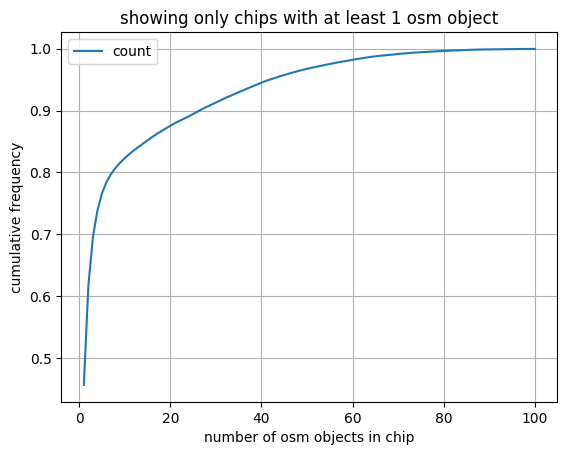

In [14]:
k.iloc[:100].cumsum().plot()
plt.grid()
plt.xlabel("number of osm objects in chip")
plt.ylabel("cumulative frequency")
plt.title("showing only chips with at least 1 osm object")

In [22]:
z.explore()